In [173]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import warnings
import matplotlib.pyplot as plt
import scipy.stats as stats

#ignore warning messages
warnings.filterwarnings("ignore")

In [174]:


#reset view paramaters for output
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.max_colwidth")

# File to Load (Remember to Change These)
nfl_data = Path("output_data/nfl.csv")
stadium_data = Path("output_data/stadiums.csv")
bet_data_df = pd.read_csv(nfl_data)
#stadium_df = pd.read_csv(stadium_data)
bet_data_df
#stadium_df

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,10809,9/5/2013,2013,1,False,DEN,49,27,BAL,DEN,-7.5,49.5,Sports Authority Field at Mile High,False,83.0,7.0,30.0,NaN
1,10810,9/8/2013,2013,1,False,BUF,21,23,NE,NE,-10.5,51.5,Ralph Wilson Stadium,False,65.0,6.0,55.0,NaN
2,10811,9/8/2013,2013,1,False,CAR,7,12,SEA,SEA,-3.5,45.0,Bank of America Stadium,False,87.0,7.0,48.0,NaN
3,10812,9/8/2013,2013,1,False,CHI,24,21,CIN,CHI,-3.0,42.0,Soldier Field,False,77.0,13.0,79.0,NaN
4,10813,9/8/2013,2013,1,False,CLE,10,23,MIA,CLE,-2.5,40.5,FirstEnergy Stadium,False,72.0,16.0,80.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,13511,1/22/2023,2022,Division,True,BUF,10,27,CIN,BUF,-6.0,48.5,Highmark Stadium,False,32.0,4.0,100.0,snow
2703,13512,1/22/2023,2022,Division,True,SF,19,12,DAL,SF,-3.5,46.5,Levi's Stadium,False,55.0,19.0,47.0,NaN
2704,13513,1/29/2023,2022,Conference,True,KC,23,20,CIN,KC,-1.5,48.0,GEHA Field at Arrowhead Stadium,False,22.0,13.0,55.0,NaN
2705,13514,1/29/2023,2022,Conference,True,PHI,31,7,SF,PHI,-2.5,45.5,Lincoln Financial Field,False,52.0,14.0,48.0,rain


In [175]:
stadium_list_df = pd.DataFrame(bet_data_df["stadium"])
stadium_list_df


,stadium
0,Sports Authority Field at Mile High
1,Ralph Wilson Stadium
2,Bank of America Stadium
3,Soldier Field
4,FirstEnergy Stadium
...,...
2702,Highmark Stadium
2703,Levi's Stadium
2704,GEHA Field at Arrowhead Stadium
2705,Lincoln Financial Field


In [176]:
#set option to show all stadiums and print new 
pd.set_option('display.max_rows', None)

print(bet_data_df.stadium.value_counts())

MetLife Stadium                        163
Gillette Stadium                        91
Lambeau Field                           87
Lincoln Financial Field                 87
Bank of America Stadium                 85
M&T Bank Stadium                        83
FedEx Field                             83
Raymond James Stadium                   83
Arrowhead Stadium                       83
Lucas Oil Stadium                       83
Ford Field                              83
Soldier Field                           82
FirstEnergy Stadium                     80
Heinz Field                             77
Levi's Stadium                          77
Nissan Stadium                          75
Paul Brown Stadium                      75
CenturyLink Field                       70
Sports Authority Field at Mile High     69
University of Phoenix Stadium           67
U.S. Bank Stadium                       60
SoFi Stadium                            53
NRG Stadium                             52
Oakland Col

In [177]:
#ensure DF outputs correctly
pd.reset_option('all')

#created new DF with desired columns
filtered_stadium_df = bet_data_df[["schedule_date", "schedule_season", "team_home", "score_home", "score_away", "team_away", 
                                   "team_favorite_id", "spread_favorite", "over_under_line", 
                                   "stadium", "weather_temperature",	"weather_wind_mph",	"weather_humidity" ]].copy()

#add new columns for game winner and stadium type
filtered_stadium_df["game_winner"] = ""
filtered_stadium_df["stadium_type"] = ""

#re-order columns in desired order
final_stadium_df = filtered_stadium_df[["schedule_date", "schedule_season", "team_home", "score_home", "score_away", 
                                        "team_away", "team_favorite_id", "game_winner", "spread_favorite", "over_under_line",
                                          "stadium", "stadium_type", "weather_temperature", "weather_wind_mph", "weather_humidity" ]]
final_stadium_df

,schedule_date,schedule_season,team_home,score_home,score_away,team_away,team_favorite_id,game_winner,spread_favorite,over_under_line,stadium,stadium_type,weather_temperature,weather_wind_mph,weather_humidity
0,9/5/2013,2013,DEN,49,27,BAL,DEN,,-7.5,49.5,Sports Authority Field at Mile High,,83.0,7.0,30.0
1,9/8/2013,2013,BUF,21,23,NE,NE,,-10.5,51.5,Ralph Wilson Stadium,,65.0,6.0,55.0
2,9/8/2013,2013,CAR,7,12,SEA,SEA,,-3.5,45.0,Bank of America Stadium,,87.0,7.0,48.0
3,9/8/2013,2013,CHI,24,21,CIN,CHI,,-3.0,42.0,Soldier Field,,77.0,13.0,79.0
4,9/8/2013,2013,CLE,10,23,MIA,CLE,,-2.5,40.5,FirstEnergy Stadium,,72.0,16.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,1/22/2023,2022,BUF,10,27,CIN,BUF,,-6.0,48.5,Highmark Stadium,,32.0,4.0,100.0
2703,1/22/2023,2022,SF,19,12,DAL,SF,,-3.5,46.5,Levi's Stadium,,55.0,19.0,47.0
2704,1/29/2023,2022,KC,23,20,CIN,KC,,-1.5,48.0,GEHA Field at Arrowhead Stadium,,22.0,13.0,55.0
2705,1/29/2023,2022,PHI,31,7,SF,PHI,,-2.5,45.5,Lincoln Financial Field,,52.0,14.0,48.0


In [178]:
# indoor(dome) stadiums are: "Lucas Oil Stadium", "Ford Field", "University of Phoenix Stadium", "U.S. Bank Stadium", "SoFi Stadium", "NRG Stadium", "AT&T Stadium", "Georgia Dome", "Mercedes-Benz Superdome",
# "Mercedes-Benz Stadium", "Reliant Stadium", "Louisiana Superdome", "Allegiant Stadium", "Edward Jones Dome", "State Farm Stadium", "Caesars Superdome", "Mall of America Field", "Rogers Centre"

# Eg: if stadium value is equal to any of the above then stadium_type = Indoor, else = Outdoor

stadiums = final_stadium_df["stadium"]
stadium_list = []

for stadium in stadiums:

    if stadium in ["Lucas Oil Stadium", "Ford Field", 
                   "University of Phoenix Stadium", "U.S. Bank Stadium", 
                   "SoFi Stadium", "NRG Stadium", "AT&T Stadium", 
                   "Georgia Dome", "Mercedes-Benz Superdome",
                    "Mercedes-Benz Stadium", "Reliant Stadium", "Louisiana Superdome",
                    "Allegiant Stadium", "Edward Jones Dome", "State Farm Stadium", 
                    "Caesars Superdome", "Mall of America Field", "Rogers Centre"]:
        
    
    #THEN print/output Indoor in stadium_type column, if not print/output Outdoor
        stadium_list.append("Indoor")
    else:
        stadium_list.append("Outdoor")

final_stadium_df["stadium_type"]=stadium_list
final_stadium_df

,schedule_date,schedule_season,team_home,score_home,score_away,team_away,team_favorite_id,game_winner,spread_favorite,over_under_line,stadium,stadium_type,weather_temperature,weather_wind_mph,weather_humidity
0,9/5/2013,2013,DEN,49,27,BAL,DEN,,-7.5,49.5,Sports Authority Field at Mile High,Outdoor,83.0,7.0,30.0
1,9/8/2013,2013,BUF,21,23,NE,NE,,-10.5,51.5,Ralph Wilson Stadium,Outdoor,65.0,6.0,55.0
2,9/8/2013,2013,CAR,7,12,SEA,SEA,,-3.5,45.0,Bank of America Stadium,Outdoor,87.0,7.0,48.0
3,9/8/2013,2013,CHI,24,21,CIN,CHI,,-3.0,42.0,Soldier Field,Outdoor,77.0,13.0,79.0
4,9/8/2013,2013,CLE,10,23,MIA,CLE,,-2.5,40.5,FirstEnergy Stadium,Outdoor,72.0,16.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,1/22/2023,2022,BUF,10,27,CIN,BUF,,-6.0,48.5,Highmark Stadium,Outdoor,32.0,4.0,100.0
2703,1/22/2023,2022,SF,19,12,DAL,SF,,-3.5,46.5,Levi's Stadium,Outdoor,55.0,19.0,47.0
2704,1/29/2023,2022,KC,23,20,CIN,KC,,-1.5,48.0,GEHA Field at Arrowhead Stadium,Outdoor,22.0,13.0,55.0
2705,1/29/2023,2022,PHI,31,7,SF,PHI,,-2.5,45.5,Lincoln Financial Field,Outdoor,52.0,14.0,48.0


In [179]:
#for loop to itterate through score columns to calculate game winner
# Eg: if score_home > score_away then team_home is the game winner else team_away winner ?
for index, row in final_stadium_df.iterrows():
    
    if row["score_home"] > row["score_away"]:
        final_stadium_df.loc[index, "game_winner"] = row["team_home"]

    else:
        final_stadium_df.loc[index, "game_winner"] = row["team_away"]

final_stadium_df

,schedule_date,schedule_season,team_home,score_home,score_away,team_away,team_favorite_id,game_winner,spread_favorite,over_under_line,stadium,stadium_type,weather_temperature,weather_wind_mph,weather_humidity
0,9/5/2013,2013,DEN,49,27,BAL,DEN,DEN,-7.5,49.5,Sports Authority Field at Mile High,Outdoor,83.0,7.0,30.0
1,9/8/2013,2013,BUF,21,23,NE,NE,NE,-10.5,51.5,Ralph Wilson Stadium,Outdoor,65.0,6.0,55.0
2,9/8/2013,2013,CAR,7,12,SEA,SEA,SEA,-3.5,45.0,Bank of America Stadium,Outdoor,87.0,7.0,48.0
3,9/8/2013,2013,CHI,24,21,CIN,CHI,CHI,-3.0,42.0,Soldier Field,Outdoor,77.0,13.0,79.0
4,9/8/2013,2013,CLE,10,23,MIA,CLE,MIA,-2.5,40.5,FirstEnergy Stadium,Outdoor,72.0,16.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,1/22/2023,2022,BUF,10,27,CIN,BUF,CIN,-6.0,48.5,Highmark Stadium,Outdoor,32.0,4.0,100.0
2703,1/22/2023,2022,SF,19,12,DAL,SF,SF,-3.5,46.5,Levi's Stadium,Outdoor,55.0,19.0,47.0
2704,1/29/2023,2022,KC,23,20,CIN,KC,KC,-1.5,48.0,GEHA Field at Arrowhead Stadium,Outdoor,22.0,13.0,55.0
2705,1/29/2023,2022,PHI,31,7,SF,PHI,PHI,-2.5,45.5,Lincoln Financial Field,Outdoor,52.0,14.0,48.0


In [180]:
#create home_team_won column using 1 = home team won game, 0 = loss (away team won)
final_stadium_df["home_team_won"] = final_stadium_df.apply(lambda row: int(row["team_home"] == row["game_winner"]), axis=1)

#new df to include column in desired order
winner_stadium_df = final_stadium_df[["schedule_date", "schedule_season", "team_home", "score_home", "score_away", "team_away", "team_favorite_id", 
                                        "game_winner", "home_team_won", "spread_favorite", "over_under_line", "stadium", "stadium_type", "weather_temperature", "weather_wind_mph", "weather_humidity" ]]

winner_stadium_df.to_csv("output_data/Justin_nfl.csv")
winner_stadium_df


,schedule_date,schedule_season,team_home,score_home,score_away,team_away,team_favorite_id,game_winner,home_team_won,spread_favorite,over_under_line,stadium,stadium_type,weather_temperature,weather_wind_mph,weather_humidity
0,9/5/2013,2013,DEN,49,27,BAL,DEN,DEN,1,-7.5,49.5,Sports Authority Field at Mile High,Outdoor,83.0,7.0,30.0
1,9/8/2013,2013,BUF,21,23,NE,NE,NE,0,-10.5,51.5,Ralph Wilson Stadium,Outdoor,65.0,6.0,55.0
2,9/8/2013,2013,CAR,7,12,SEA,SEA,SEA,0,-3.5,45.0,Bank of America Stadium,Outdoor,87.0,7.0,48.0
3,9/8/2013,2013,CHI,24,21,CIN,CHI,CHI,1,-3.0,42.0,Soldier Field,Outdoor,77.0,13.0,79.0
4,9/8/2013,2013,CLE,10,23,MIA,CLE,MIA,0,-2.5,40.5,FirstEnergy Stadium,Outdoor,72.0,16.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,1/22/2023,2022,BUF,10,27,CIN,BUF,CIN,0,-6.0,48.5,Highmark Stadium,Outdoor,32.0,4.0,100.0
2703,1/22/2023,2022,SF,19,12,DAL,SF,SF,1,-3.5,46.5,Levi's Stadium,Outdoor,55.0,19.0,47.0
2704,1/29/2023,2022,KC,23,20,CIN,KC,KC,1,-1.5,48.0,GEHA Field at Arrowhead Stadium,Outdoor,22.0,13.0,55.0
2705,1/29/2023,2022,PHI,31,7,SF,PHI,PHI,1,-2.5,45.5,Lincoln Financial Field,Outdoor,52.0,14.0,48.0


In [181]:
# ANALYSIS OVER HOW INDOOR VS. OUTDOOR STADIUMS AFFECTS OVER/UNDER LINE

over_under_stadium_df = winner_stadium_df[["stadium_type","over_under_line"]]
over_under_stadium_df

,stadium_type,over_under_line
0,Outdoor,49.5
1,Outdoor,51.5
2,Outdoor,45.0
3,Outdoor,42.0
4,Outdoor,40.5
...,...,...
2702,Outdoor,48.5
2703,Outdoor,46.5
2704,Outdoor,48.0
2705,Outdoor,45.5


In [182]:

#calculate average over/under line for indoor vs. outdoor stadiums 
average_over_under_indoor = winner_stadium_df[winner_stadium_df['stadium_type'] == 'Indoor']['over_under_line'].dropna().mean()
average_over_under_outdoor = winner_stadium_df[winner_stadium_df['stadium_type'] == 'Outdoor']['over_under_line'].dropna().mean()

print("Average Over-Under Line for Indoor Stadiums:", average_over_under_indoor)
print("Average Over-Under Line for Outdoor Stadiums:", average_over_under_outdoor)

Average Over-Under Line for Indoor Stadiums: 47.04834254143646
Average Over-Under Line for Outdoor Stadiums: 45.27534039334342


In [183]:
#summary statistics table for over/under line by indoor and outdoor games
over_under_agg = winner_stadium_df.groupby(["stadium_type"])[["over_under_line"]].agg(["mean", "median", "var", "std", "sem"])
over_under_agg

over_under_line                                      
                        mean median        var       std       sem
stadium_type                                                      
Indoor             47.048343   47.0  19.314396  4.394815  0.163332
Outdoor            45.275340   45.0  17.597711  4.194963  0.094203

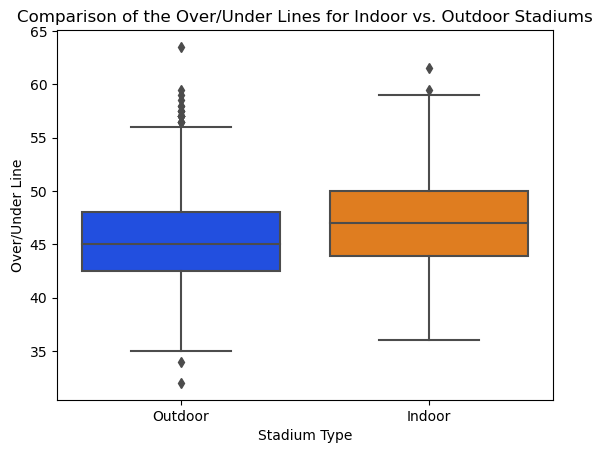

In [190]:
# plot above data into box and whisker plot 

import seaborn as sns
sns.set_palette("bright")

ax= sns.boxplot(data=winner_stadium_df, x="stadium_type", y="over_under_line")

ax.set(xlabel='Stadium Type', ylabel='Over/Under Line', title="Comparison of the Over/Under Lines for Indoor vs. Outdoor Stadiums")

plt.savefig("output_data\overunder_by_stadium.png")
plt.show()


In [185]:
# Perform Independent T-test to test Alternate Hypothesis

# Perform independent t-test
indoor_scores = winner_stadium_df[winner_stadium_df["stadium_type"] == "Indoor"]["over_under_line"]
outdoor_scores = winner_stadium_df[winner_stadium_df["stadium_type"] == "Outdoor"]["over_under_line"]

t_statistic, p_value = stats.ttest_ind(indoor_scores, outdoor_scores)

# Print the t-test results
print("Independent Two-Sample T-test Results:")
print("======================================")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Independent Two-Sample T-test Results:
t-statistic: 9.609003843346978
p-value: 1.6094736737939994e-21


In [186]:
#summary statistics table for weather metrics of indoor vs. outdoor stadiums 
weather_agg = final_stadium_df.groupby(["stadium_type"])[["weather_temperature", "weather_wind_mph", "weather_humidity"]
                                                          ].agg(["mean", "median", "var", "std", "sem"])
weather_agg

weather_temperature                                          \
                            mean median         var        std       sem   
stadium_type                                                               
Indoor                 71.946252   72.0    9.195407   3.032393  0.114045   
Outdoor                57.946759   60.0  308.623418  17.567681  0.487991   

             weather_wind_mph                                        \
                         mean median        var       std       sem   
stadium_type                                                          
Indoor               0.308345    0.0   2.366545  1.538358  0.057856   
Outdoor              6.804633    6.0  20.345883  4.510641  0.125344   

             weather_humidity                                          
                         mean median         var        std       sem  
stadium_type                                                           
Indoor              67.222222   75.0  675.694444  25.994123  8.664708  
Outdoor             62.217899   63.0  376.139835  19.394325  1.209785

In [187]:
# ANALYSIS OF HOME GAMES WON BY TEAMS WITH INDOOR STADIUMS VS. OUTDOOR STADIUMS

#print total number of games played at indoor and outdoor stadiums
print(final_stadium_df.groupby("stadium_type")["home_team_won"].count())

#print total games won by home teams in indoor stadiums and games won by home teams in outdoor stadiums
print(final_stadium_df.groupby("stadium_type")["home_team_won"].sum())

#print percenatage of 
final_stadium_df.groupby("stadium_type")["home_team_won"].sum() / final_stadium_df.groupby("stadium_type")["home_team_won"].count()

stadium_type
Indoor      724
Outdoor    1983
Name: home_team_won, dtype: int64
stadium_type
Indoor      390
Outdoor    1112
Name: home_team_won, dtype: int64


stadium_type
Indoor     0.538674
Outdoor    0.560767
Name: home_team_won, dtype: float64

In [188]:
#Formulate the above output into a clean Dataframe
# Group by "stadium_type" and calculate the count of games played
games_played = final_stadium_df.groupby("stadium_type")["home_team_won"].count()

# Convert the count series to a DataFrame
games_played_df = pd.DataFrame({"Total Games Played": games_played})

# Group by "stadium_type" and calculate the sum of games won by home teams
games_won = final_stadium_df.groupby("stadium_type")["home_team_won"].sum()

# Convert the sum series to a DataFrame
games_won_df = pd.DataFrame({"Games Won by Home Teams": games_won})

# Percentage of games won by home teams
percentage_won = games_won / games_played

# Convert the percentage series to a DataFrame
percentage_won_df = pd.DataFrame({"Percentage of Games Won": percentage_won})

# Print the DataFrame
percentage_won_df

indoor_outdoor_df = pd.concat([games_played_df, games_won_df, percentage_won_df], axis=1)
indoor_outdoor_df

,Total Games Played,Games Won by Home Teams,Percentage of Games Won
stadium_type,,,
Indoor,724,390,0.538674
Outdoor,1983,1112,0.560767


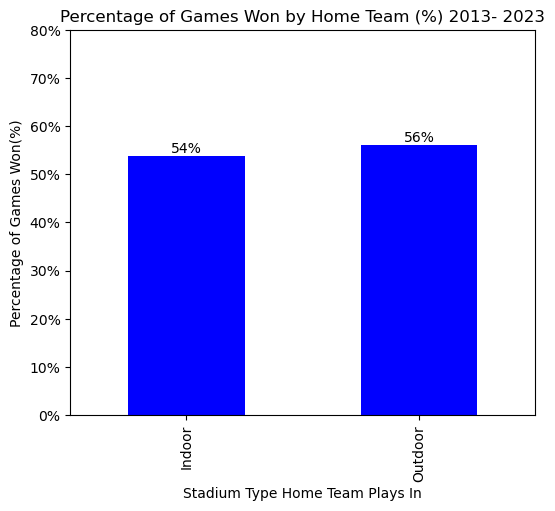

In [189]:
#create pie plot to visualize indoor/outdoor adavantage 
import matplotlib.ticker as mtick

home_field_data = final_stadium_df.groupby("stadium_type")["home_team_won"].sum() / final_stadium_df.groupby("stadium_type")["home_team_won"].count()


home_field_data.plot(kind="bar", figsize=(6,5), ylim=(0,.8), color="blue")
plt.xlabel("Stadium Type Home Team Plays In")
plt.title("Percentage of Games Won by Home Team (%) 2013- 2023")
plt.ylabel("Percentage of Games Won(%)")


# Create a function to format the y-axis as percentages
def percentage_format(x, _):
    return '{:.0f}%'.format(x * 100)

#Apply the percentage format to the y-axis
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(percentage_format))

# Add actual percentges to the bars
for i, value in enumerate(home_field_data):
    plt.annotate(f'{value:.0%}', (i, value), ha='center', va='bottom')

ax.set_ylim([0,70])
#save plot in output folder
plt.savefig("output_data\homegames.png")

plt.show()